# Inicializando o DataFrame original

In [385]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

df= pd.read_csv('TED_TALKS_data.csv').drop(columns =['link'])
df

,title,author,date,views,likes
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72
...,...,...,...,...,...
5435,The best stats you've ever seen,Hans Rosling,February 2006,15000000,458000
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000
5437,Greening the ghetto,Majora Carter,February 2006,2900000,88000
5438,Simplicity sells,David Pogue,February 2006,2000000,60000


# Separando o ano da coluna 'date':

In [386]:
df['date'] = pd.to_datetime(df['date'])
df['anos']= df['date'].dt.year
df

,title,author,date,views,likes,anos
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,2021-12-01,404000,12000,2021
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,2022-02-01,214000,6400,2022
2,How play can spark new ideas for your business,Martin Reeves,2021-09-01,412000,12000,2021
3,Why is China appointing judges to combat clima...,James K. Thornton,2021-10-01,427000,12000,2021
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,2021-10-01,2400,72,2021
...,...,...,...,...,...,...
5435,The best stats you've ever seen,Hans Rosling,2006-02-01,15000000,458000,2006
5436,Do schools kill creativity?,Sir Ken Robinson,2006-02-01,72000000,2100000,2006
5437,Greening the ghetto,Majora Carter,2006-02-01,2900000,88000,2006
5438,Simplicity sells,David Pogue,2006-02-01,2000000,60000,2006


In [387]:
#Inicializando DataFrames auxiliares

df2 = pd.DataFrame()  # Em relação aos anos
df3 = pd.DataFrame()  # Em relação aos autores

## Coletando dados dos vídeos

### Agrupando todos os anos (sem repetições) do dataframe principal

In [388]:
anossemrep = []
for c in df['anos']:
    if c not in anossemrep:
        anossemrep.append(c)
anossemrep = pd.DataFrame(anossemrep, columns = ['Ano']).sort_values(by="Ano", ascending=False).reset_index(drop=True)
df2['Anos'] = anossemrep

### Coletando a quantidade de vídeos postados por ano

In [389]:
contagemano= []
for c in anossemrep['Ano']:
    cont = 0
    for i in df['anos']:
        if c == i:
            cont += 1
    contagemano.append(cont)
contagemano = pd.DataFrame(contagemano, columns=['Quantidade de Vídeos'])
df2['Quantidade de Vídeos'] = contagemano

### Coletando as vizualizações por ano

In [390]:
viewyear= []
for c in anossemrep['Ano']:
    total = 0
    for n ,i in enumerate(df['anos']):
        if c == i:
            total += df['views'][n]
    viewyear.append(total)
viewyear = pd.DataFrame(viewyear, columns=['Visualização']).reset_index().drop(columns=['index'])
df2['Visualização'] = viewyear

### Coletando a quantidade de likes por ano

In [391]:
likes = []
for c in anossemrep['Ano']:
    total = 0
    for n ,i in enumerate(df['anos']):
        if c == i:
            total += df['likes'][n]
    likes.append(total)
likes = pd.DataFrame(likes, columns=['Likes']).reset_index().drop(columns=['index'])
df2['Likes'] = likes

### Calculando a média de visualizações por ano

In [392]:
media_views = pd.DataFrame(viewyear['Visualização'] / contagemano['Quantidade de Vídeos'], columns=['Média de visualização']).round(2)
df2['Média de visualização'] = media_views


### Calculando a média de likes por ano

In [393]:
media_like = pd.DataFrame(df2['Likes'] / df2['Quantidade de Vídeos'], columns=['Média de likes']).round(2)
df2['Média de Likes'] = media_like

In [394]:
df2.head()

,Anos,Quantidade de Vídeos,Visualização,Likes,Média de visualização,Média de Likes
0,2022,20,11470000,341254,573500.00,17062.70
1,2021,390,429728700,13058238,1101868.46,33482.66
2,2020,501,635944200,19297014,1269349.70,38516.99
3,2019,544,948119299,28764575,1742866.36,52876.06
4,2018,473,811857597,24671493,1716400.84,52159.60


## Coletando dados dos autores

### Agrupando todos os autores (sem repetição)

In [395]:
autsemrep = []
for a in df['author']:
    if a not in autsemrep:
        autsemrep.append(a)
autsemrep = pd.DataFrame(autsemrep, columns = ['Autor'])
df3['Autor'] = autsemrep

### Coletando a quantidade de vídeos postados por autor

In [396]:
contagemaut= []
for c in autsemrep['Autor']:
    cont = 0
    for i in df['author']:
        if c == i:
            cont += 1
    contagemaut.append(cont)
contagemaut = pd.DataFrame(contagemaut, columns=['Quantidade de Vídeos'])
df3['Quantidade de Vídeos'] = contagemaut

### Coletando a quantidade de visualizações por autor

In [397]:
viewaut= []
for c in autsemrep['Autor']:
    total = 0
    for n ,i in enumerate(df['author']):
        if c == i:
            total += df['views'][n]
    viewaut.append(total)
viewaut = pd.DataFrame(viewaut, columns=['Visualizações totais']).reset_index().drop(columns=['index'])
df3['Visualizações totais'] = viewaut

### Coletando a quantidade de likes por autor

In [398]:
likesaut = []
for c in autsemrep['Autor']:
    total = 0
    for n ,i in enumerate(df['author']):
        if c == i:
            total += df['likes'][n]
    likesaut.append(total)
likesaut = pd.DataFrame(likesaut, columns=['Likes totais']).reset_index().drop(columns=['index'])
df3['Likes totais'] = likesaut

### Agrupando os 10 maiores autores em relação à quantidade de vídeos postados

In [399]:
df3_vp = pd.DataFrame()
df3_vp = df3.sort_values(by='Quantidade de Vídeos', ascending = False).reset_index().drop(columns=['index']).iloc[0:10]

### Agrupando os 10 maiores autores em relação à quantidade de visualizações totais

In [400]:
df3_vt = pd.DataFrame()
df3_vt = df3.sort_values(by='Visualizações totais', ascending = False).reset_index().drop(columns=['index']).iloc[0:10]

### Agrupando os 10 maiores autores em relação à quantidade de likes totais

In [401]:
df3_lt = pd.DataFrame()
df3_lt = df3.sort_values(by='Likes totais', ascending = False).reset_index().drop(columns=['index']).iloc[0:10]

In [402]:
df3 = df3.sort_values(by='Autor', ascending = True)
df3

,Autor,Quantidade de Vídeos,Visualizações totais,Likes totais
2645,B.E.A.T. NYC,1,3200,98
633,Beautyrest,1,60000,1800
14,Belle and Sebastian,1,23000,690
800,Butterscotch,1,31000,933
1186,Climbing PoeTree,1,12000,367
...,...,...,...,...
3389,iO Tillett Wright,1,3100000,93000
172,monday.com,1,6000,181
1758,tobacco brown,1,1300000,40000
1532,Özlem Cekic,1,2000000,60000






# Gráficos

#### Padronização do tamanho dos gráficos (para alterar o tamanho de um gráfico específico, basta rodar a linha antes de plotar o gráfico)

In [403]:
plt.rcParams['figure.figsize']=(15,8)

### Plotando gráfico do ano x quantidade de vídeos

Text(0.5, 1.0, 'Quantidade de vídeos postados por ano')

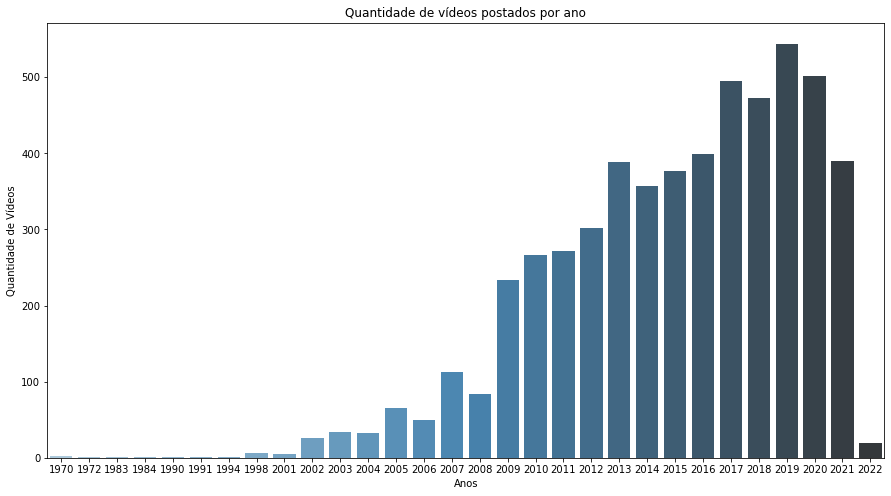

In [404]:
graf_med_like = sns.barplot(data=df2, x="Anos", y="Quantidade de Vídeos", palette="Blues_d")
graf_med_like.set_title('Quantidade de vídeos postados por ano')

### Plotando gráfico do total de views x ano

Text(0.5, 1.0, 'Visualizações totais por ano')

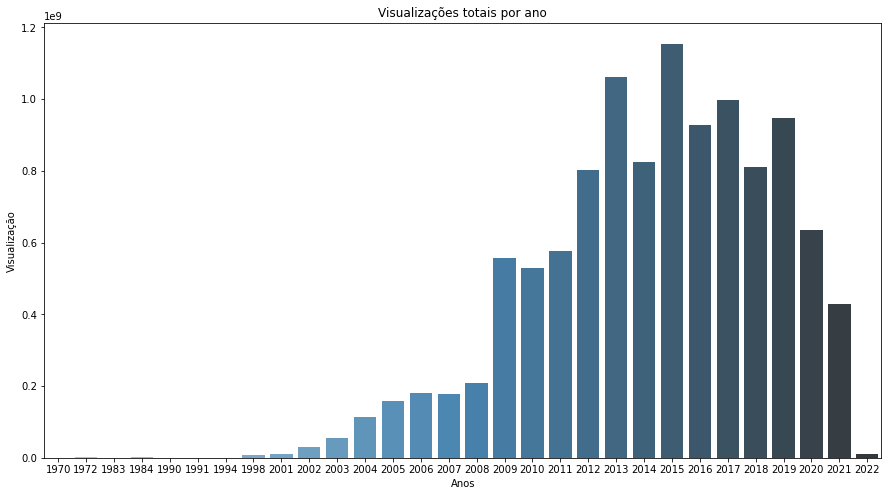

In [405]:
#plt.rcParams['figure.figsize']=(15,8)
graf_med_like = sns.barplot(data=df2, x="Anos", y="Visualização", palette="Blues_d")
graf_med_like.set_title('Visualizações totais por ano')

### Plotando gráfico da média de visualizações x ano

Text(0.5, 1.0, 'Média de visualizações por ano')

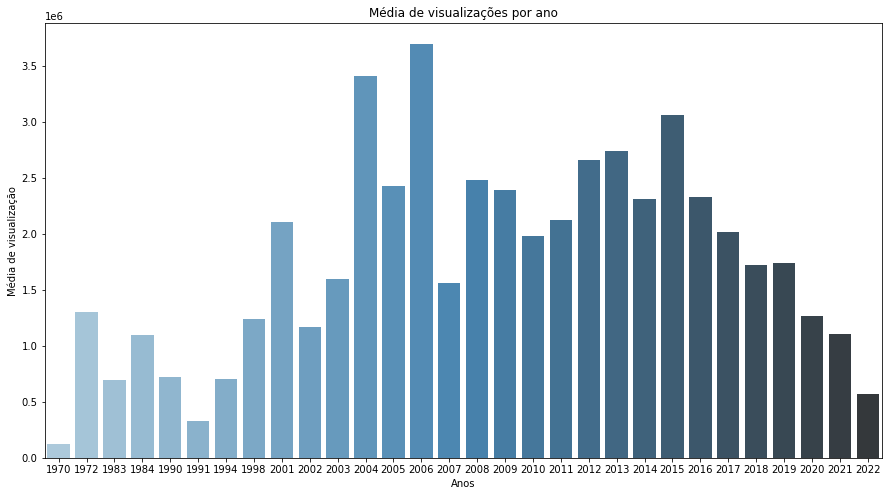

In [406]:
#plt.rcParams['figure.figsize']=(15,8)
graf_med_like = sns.barplot(data=df2, x="Anos", y="Média de visualização", palette="Blues_d")
graf_med_like.set_title('Média de visualizações por ano')

### Plotando gráfico do total de likes x ano

Text(0.5, 1.0, 'Total de likes por ano')

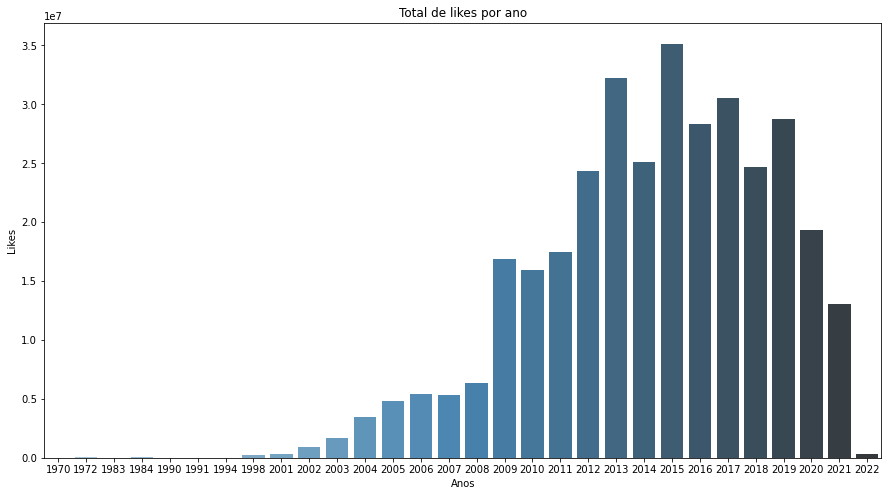

In [407]:
#plt.rcParams['figure.figsize']=(15,8)
graf_tot_like = sns.barplot(data=df2, x="Anos", y="Likes", palette="Blues_d")
graf_tot_like.set_title('Total de likes por ano')

### Plotando gráfico da média de likes por vídeo x ano:


Text(0.5, 1.0, 'Média de likes por ano')

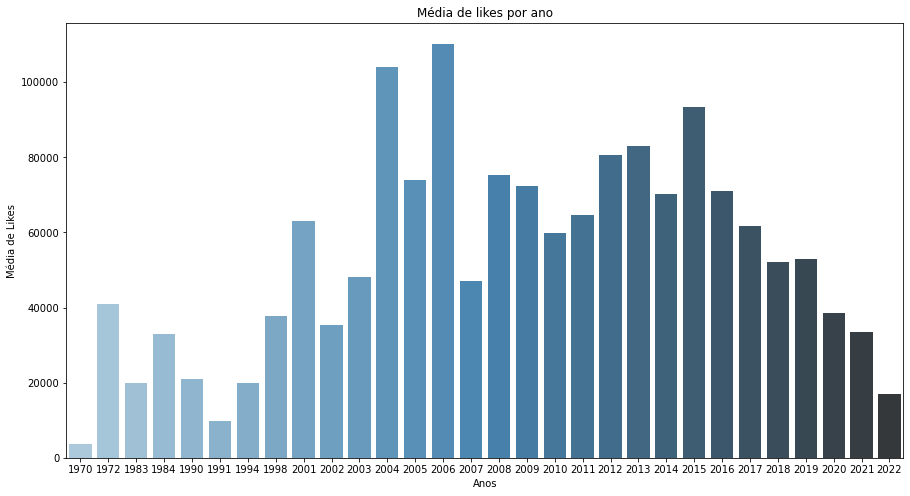

In [408]:
#plt.rcParams['figure.figsize']=(15,8)
graf_med_like = sns.barplot(data=df2, x="Anos", y="Média de Likes", palette="Blues_d")
graf_med_like.set_title('Média de likes por ano')

### Plotando gráfico da Quantidade de vídeos x Autor (10 autores que mais postaram)

<AxesSubplot:xlabel='Quantidade de Vídeos', ylabel='Autor'>

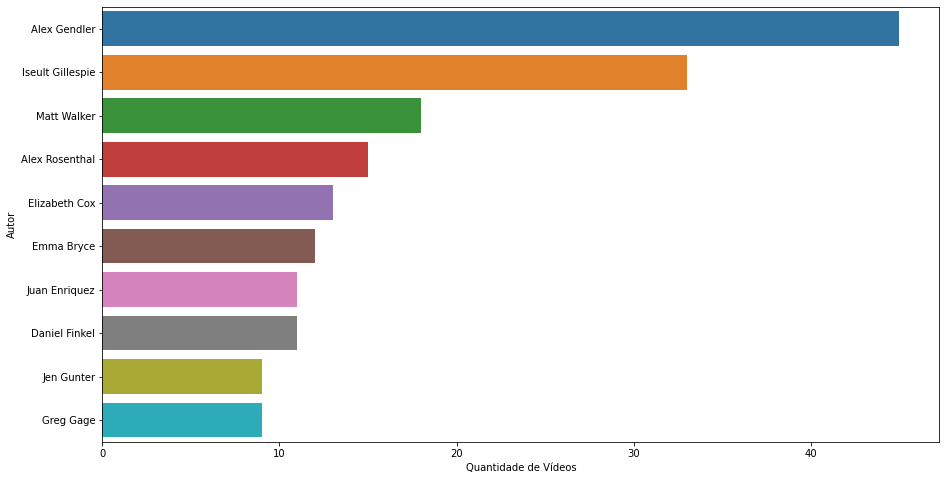

In [409]:
sns.barplot(data=df3_vp, x="Quantidade de Vídeos", y="Autor")

### Plotando gráfico da Quantidade de visualizações x Autor (10 autores mais vistos)

<AxesSubplot:xlabel='Visualizações totais', ylabel='Autor'>

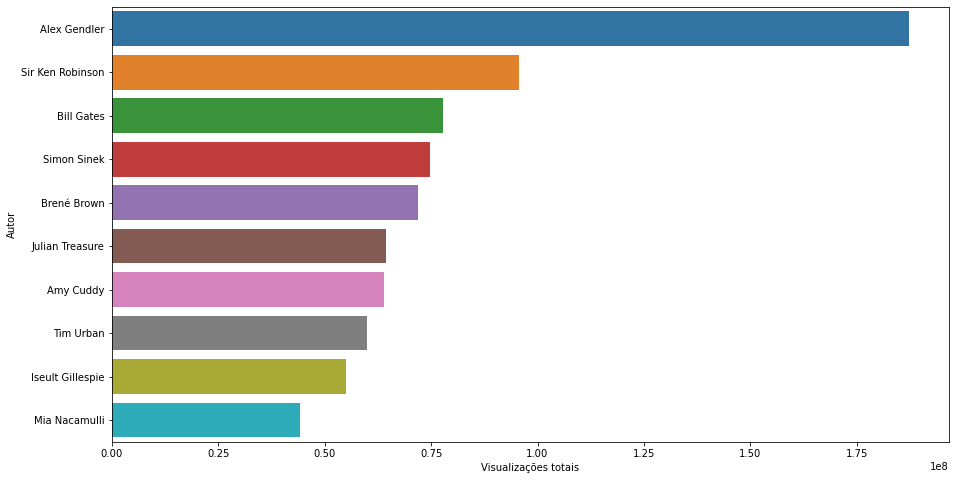

In [410]:
sns.barplot(data=df3_vt, x="Visualizações totais", y="Autor")

### Plotando gráfico da Quantidade de likes x Autor (10 autores com mais likes)

<AxesSubplot:xlabel='Likes totais', ylabel='Autor'>

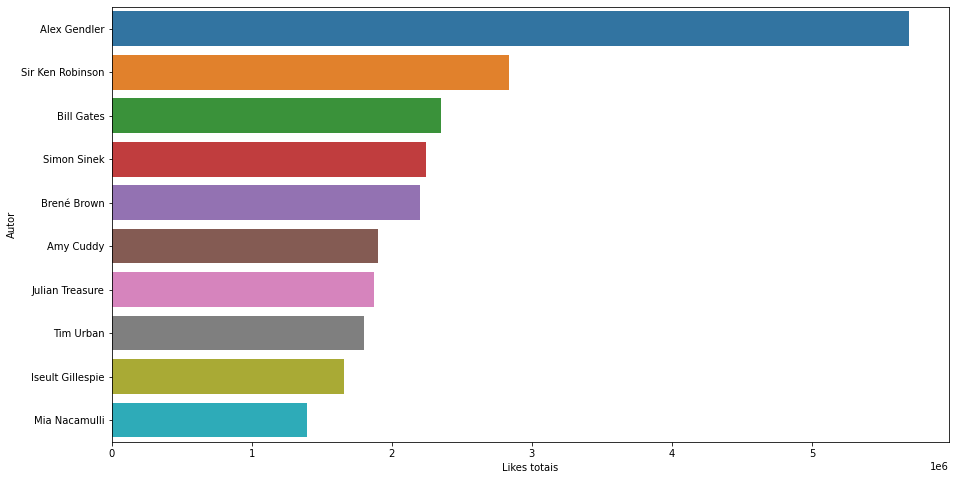

In [411]:
sns.barplot(data=df3_lt, x="Likes totais", y="Autor")

# Medidas de tendências:

<AxesSubplot:>

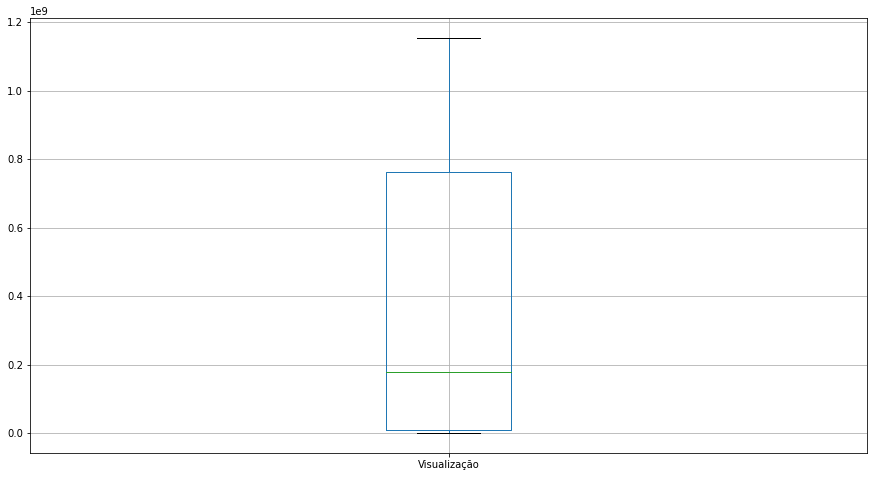

In [412]:
df2.boxplot(column=['Visualização'])

In [413]:
df2['Visualização'].std()

401420035.7024643

In [414]:
df2['Likes'].std()

12207323.752143247

<AxesSubplot:>

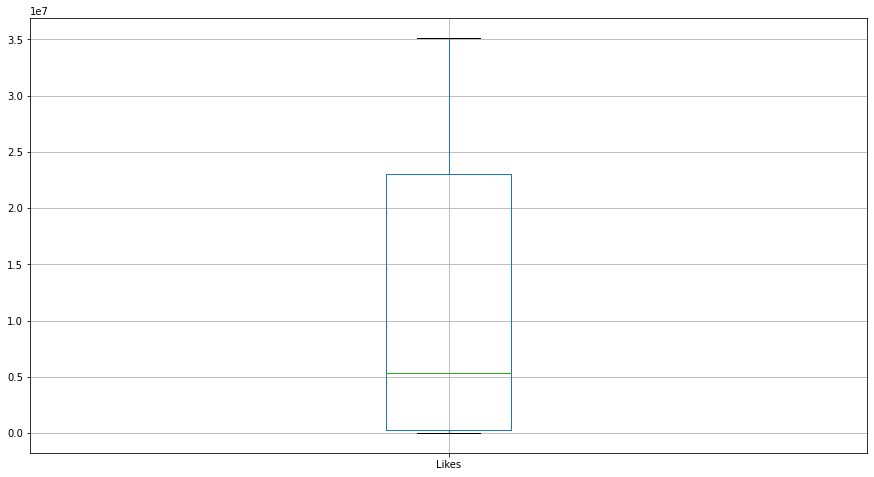

In [415]:
df2.boxplot(column='Likes')

# Correlação entre vizualizações e likes por ano:

<AxesSubplot:xlabel='Visualização', ylabel='Likes'>

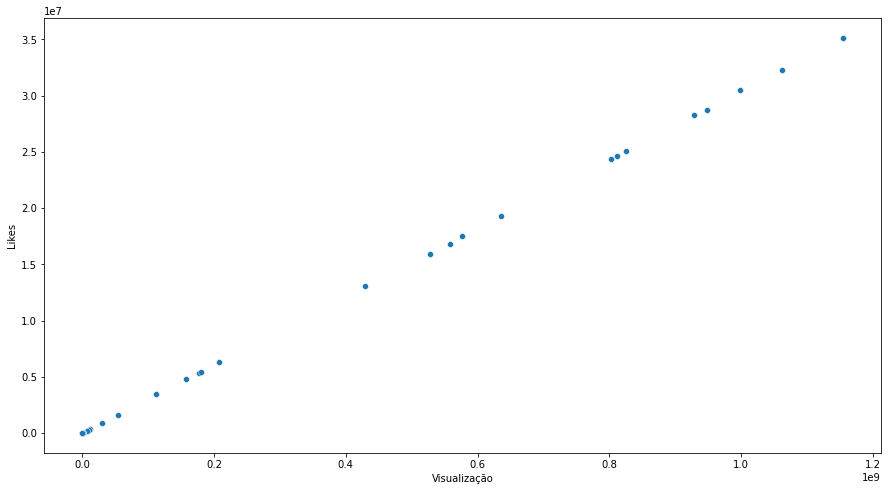

In [416]:
sns.scatterplot(data=df2, x="Visualização", y="Likes")

In [417]:
df2[['Likes', 'Visualização']].corr()

,Likes,Visualização
Likes,1.000000,0.999991
Visualização,0.999991,1.000000


# Correlação entre vizualizações e quantidade de vídeos por ano


<AxesSubplot:xlabel='Visualização', ylabel='Quantidade de Vídeos'>

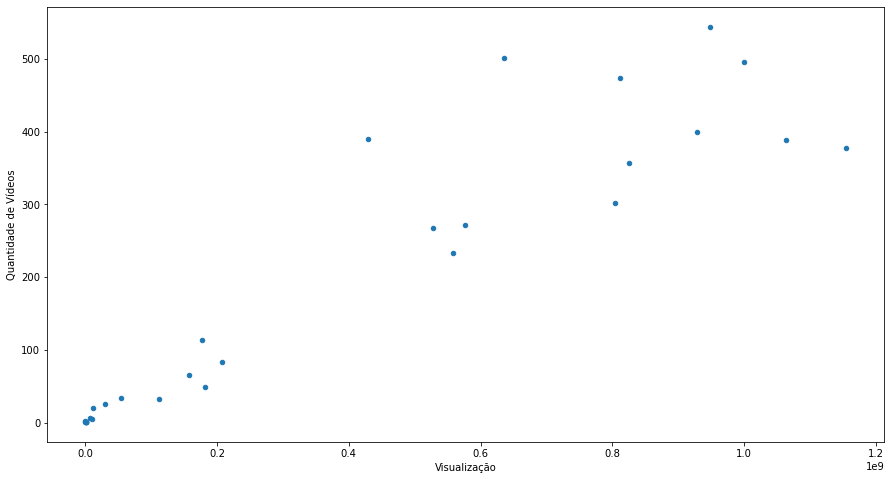

In [418]:
df2.plot.scatter(x = 'Visualização', y=  'Quantidade de Vídeos')

In [419]:
df2[['Quantidade de Vídeos', 'Visualização']].corr()

,Quantidade de Vídeos,Visualização
Quantidade de Vídeos,1.000000,0.930978
Visualização,0.930978,1.000000


# Correlação entre vídeos por ano e quantidade de likes

<AxesSubplot:xlabel='Quantidade de Vídeos', ylabel='Likes'>

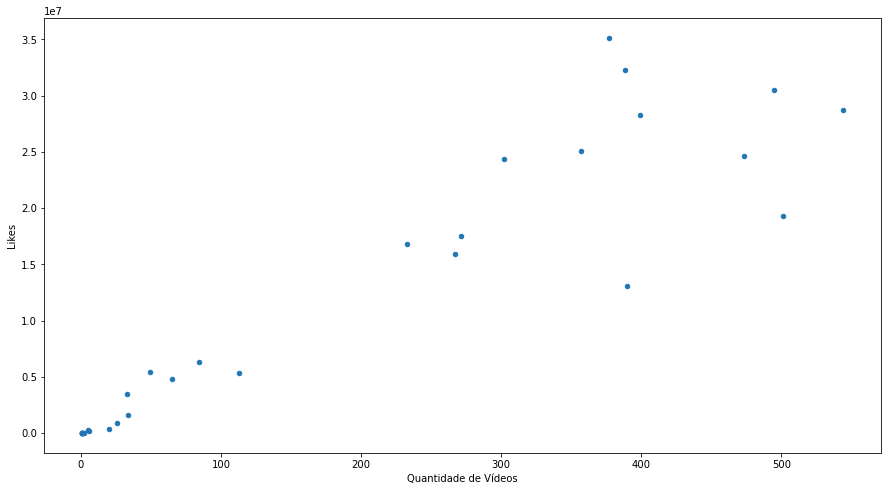

In [420]:
df2.plot.scatter(x = 'Quantidade de Vídeos', y= 'Likes')

In [421]:
df2[['Likes', 'Quantidade de Vídeos']].corr()

,Likes,Quantidade de Vídeos
Likes,1.000000,0.930925
Quantidade de Vídeos,0.930925,1.000000


# AGRUPAMENTO


In [422]:
from sklearn.cluster import KMeans
df3

,Autor,Quantidade de Vídeos,Visualizações totais,Likes totais
2645,B.E.A.T. NYC,1,3200,98
633,Beautyrest,1,60000,1800
14,Belle and Sebastian,1,23000,690
800,Butterscotch,1,31000,933
1186,Climbing PoeTree,1,12000,367
...,...,...,...,...
3389,iO Tillett Wright,1,3100000,93000
172,monday.com,1,6000,181
1758,tobacco brown,1,1300000,40000
1532,Özlem Cekic,1,2000000,60000


<AxesSubplot:xlabel='Quantidade de Vídeos', ylabel='Visualizações totais'>

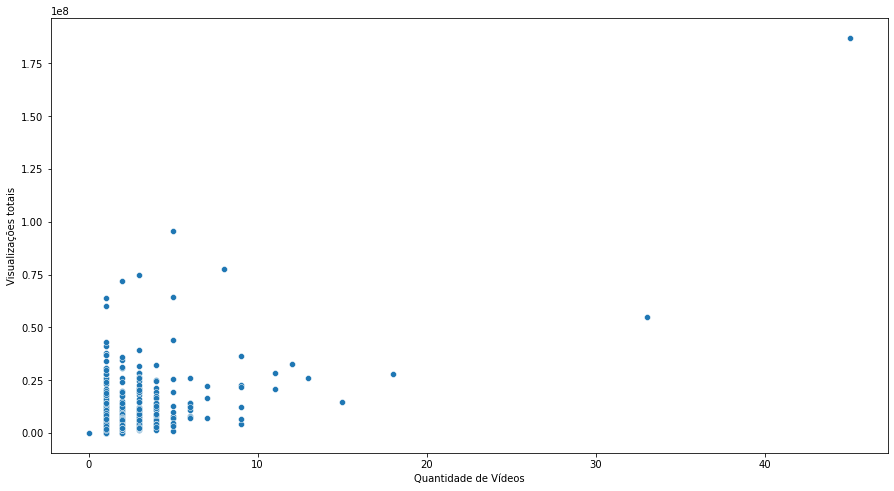

In [423]:
sns.scatterplot(data = df3, x = 'Quantidade de Vídeos', y = 'Visualizações totais')

In [424]:
data_teste = df3[['Quantidade de Vídeos', 'Visualizações totais']]
data_teste

,Quantidade de Vídeos,Visualizações totais
2645,1,3200
633,1,60000
14,1,23000
800,1,31000
1186,1,12000
...,...,...
3389,1,3100000
172,1,6000
1758,1,1300000
1532,1,2000000


In [425]:
# 271417.04405737703
#  58665.75481185481

In [426]:
kmeans = KMeans(n_clusters=5)

In [427]:
kmeans.fit(data_teste)

KMeans(n_clusters=5)

In [428]:
kmeans.labels_

array([3, 3, 3, ..., 3, 3, 3])

<AxesSubplot:xlabel='Quantidade de Vídeos', ylabel='Visualizações totais'>

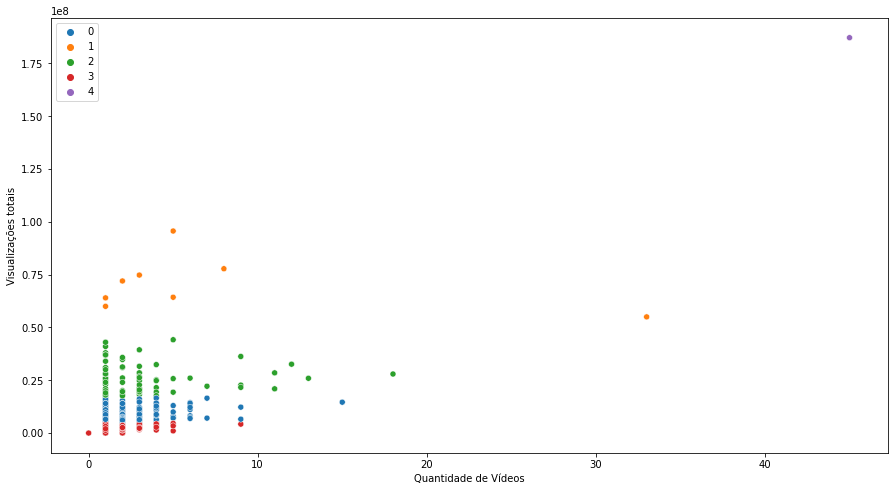

In [429]:
sns.scatterplot(data=data_teste, x="Quantidade de Vídeos", y="Visualizações totais", hue=kmeans.labels_, palette = "tab10")

In [430]:
kmeans.inertia_

1.19932842803965e+16

In [431]:
df3[kmeans.labels_ == 4]

,Autor,Quantidade de Vídeos,Visualizações totais,Likes totais
63,Alex Gendler,45,187196000,5691000


# Regressão Linear

<AxesSubplot:xlabel='Quantidade de Vídeos', ylabel='Likes'>

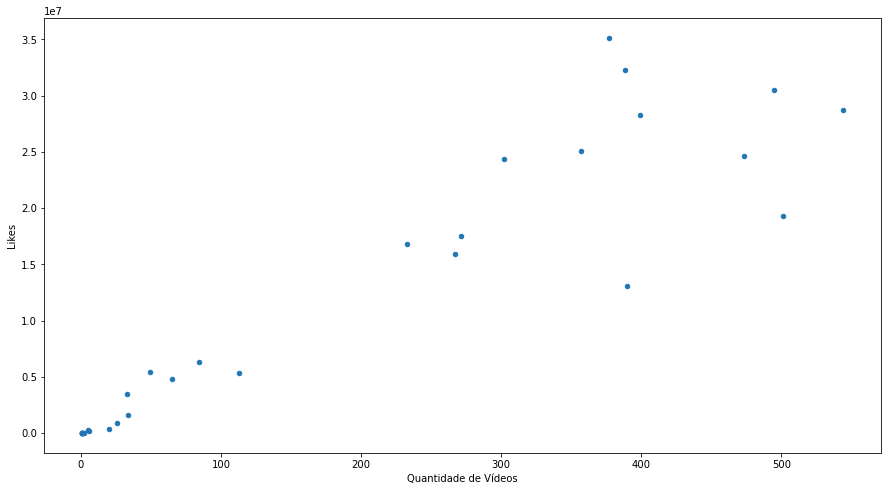

In [432]:
from scipy.stats import linregress
df2.plot.scatter(x='Quantidade de Vídeos', y='Likes')

In [433]:
coef_angular, coef_linear,_,_,std_err = linregress(df2['Quantidade de Vídeos'], df2['Likes'])

In [434]:
print(f"Coeficiente angular = {coef_angular:.2f}")
print(f"Coeficiente linear = {coef_linear:.2f}")
reta = coef_angular*df2['Quantidade de Vídeos']+coef_linear

Coeficiente angular = 58867.56
Coeficiente linear = 678196.94


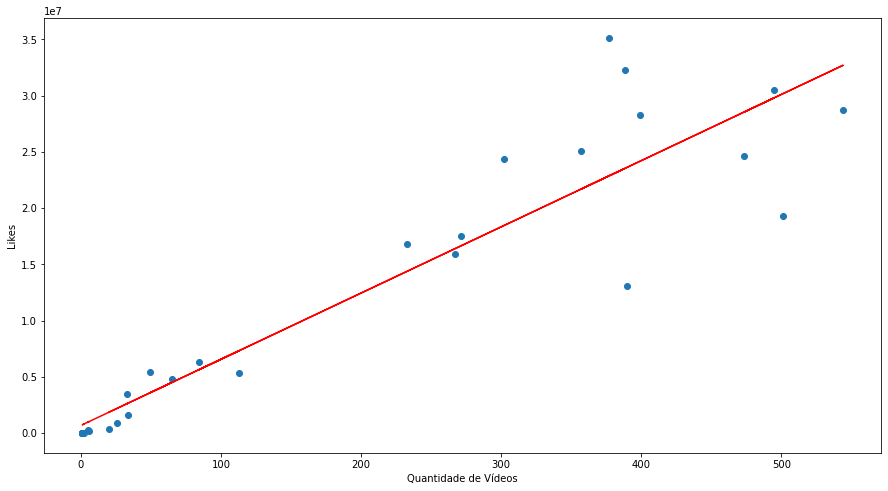

In [435]:
plt.scatter(df2['Quantidade de Vídeos'], df2['Likes'])
plt.plot(df2['Quantidade de Vídeos'], reta, color='red')
plt.xlabel('Quantidade de Vídeos')
plt.ylabel('Likes')
plt.show()

In [436]:
print(f"Se a quantidade de vídeos forem 700, pela regressão feita, dará {(coef_angular * 700 + coef_linear)/1000000:.2f}M likes")

Se a quantidade de vídeos forem 700, pela regressão feita, dará 41.89M likes


## Clusterização das palavras mais frequentes nos títulos dos vídeos

In [451]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer2 = CountVectorizer()
X2 = vectorizer2.fit_transform(df['title'])
len(X2.toarray())

5440

In [452]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
svd.fit(X2)
print(svd.explained_variance_ratio_)
print(svd.singular_values_)


[0.05398177 0.04120323]
[62.88946646 40.54500333]


In [475]:
kmeans = KMeans(n_clusters = 4,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 100,                 # MaX2imum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 1)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(X2)

plt.scatter(X2[pred_y==0, 0], X2[pred_y==0, 1], s=10, c='red', label ='Cluster 1')
plt.scatter(X2[pred_y==1, 0], X2[pred_y==1, 1], s=10, c='purple', label ='Cluster 2')
plt.scatter(X2[pred_y==2, 0], X2[pred_y==2, 1], s=10, c='green', label ='Cluster 3')
plt.scatter(X2[pred_y==3, 0], X2[pred_y==3, 1], s=10, c='black', label ='Cluster 4')


# Plot the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=100,                             # Set centroid size
            c='blue')                           # Set centroid color

plt.X2label('Standard deviation')
plt.ylabel('Mean RSSI')
plt.show()

KeyError: (array([ True, False,  True, ..., False,  True, False]), 0)